In [40]:
from ciml import gather_results
from ciml import tf_trainer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as pltcolors
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import collections
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from subunit2sql.db import api
from tensorflow.python.training import adagrad
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

In [22]:
data_path = '/Users/kw/ciml_data/output/data'
dataset = 'usr_used_1m-1min-status'
experiment = 'dnn-3x100-1000epochs-bs128'
file_name = 'prediction_usr_used_1m-1min-status'

In [23]:
#Prediction_Data consists of EID, Pred, Class
prediction_data = gather_results.load_data_json(dataset, file_name,
        sub_folder=experiment, data_path=data_path)

In [25]:
examples_id = [x[0] for x in prediction_data]
pred_classes = [x[1]['class_ids'] for x in prediction_data]
labels = [x[2] for x in prediction_data]

In [35]:
#Generates confusion matrix
confusion = confusion_matrix(labels,pred_classes)
confusion

array([[740,   5],
       [ 14,  32]])

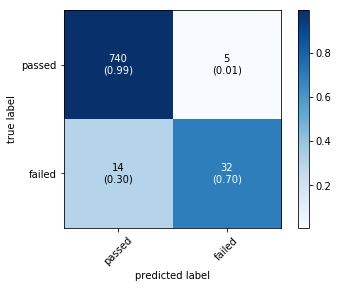

In [44]:
#Plots confusion matrix
class_names = ['passed','failed']
#class_names = ['rax', 'ovh', 'packethost-us-west-1','vexxhost', 'limestone-regionone','inap-mtl01']
fig, ax = plot_confusion_matrix(conf_mat=confusion,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                class_names=class_names)
plt.show()

In [46]:
# Generate and print metrics report using sklearn
# sklearn.metrics.classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)
#The precision is the ratio tp / (tp + fp).
#The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
#The recall is the ratio tp / (tp + fn). 
#The recall is intuitively the ability of the classifier to find all the positive samples.
#The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, 
#where an F-beta score reaches its best value at 1 and worst score at 0.
#The F-beta score weights recall more than precision by a factor of beta. 
#beta == 1.0 means recall and precision are equally important.
#F1 = 2 * (precision * recall) / (precision + recall)

The support is the number of occurrences of each class in y_true.
report = classification_report(labels, pred_classes, target_names = class_names)
print(report)

              precision    recall  f1-score   support

      passed       0.98      0.99      0.99       745
      failed       0.86      0.70      0.77        46

    accuracy                           0.98       791
   macro avg       0.92      0.84      0.88       791
weighted avg       0.97      0.98      0.97       791

